In [1]:
class Node:
    def __init__(self, value, coord):
        self.value = value
        self.coord = coord
        self.g = 0; self.h =0; #initialization
        self.parent = None
        
    def __str__(self):
        s = f'{self.coord} f= {self.g + self.h:0.2f} g={self.g:0.2f} h={self.h:0.2f}' #string formatting for a
        return s
    
    def move_cost(self, other):
        return 1

In [2]:
#use case-1
grid = [[1,1,1,1], #1- not blocked, 0-blocked
       [1,1,1,1,],
       [1,1,1,1],
       [1,1,0,0],
       [1,1,0,1]]
#converting all points to node object
for x in range(len(grid)):
    for y in range(len(grid[x])):
        grid[x][y] = Node(grid[x][y], (x,y))
        
start = grid[4][0]
goal = grid[0][3]
        

In [3]:
def children(current_node, grid):
    x,y = current_node.coord
    links = [(x-1, y), (x, y-1), (x, y+1), (x+1, y)]
    #for diagonal movements: (x+1, y+1), (x-1, y-1), (x+1, y-1), (x-1, y+1)
    valid_links = [link for row in grid for link in row if link.value!=0] #if the path is not blocked
    valid_children = [link for link in valid_links if link.coord in links] #checking/storing valid adjacent coordinates
    return valid_children

In [4]:
#4 moves
def manhattan(node, goal):
    xN, yN = node.coord
    xG, yG = goal.coord
    h = abs(xN-xG) + abs(yN-yG)
    return h

In [5]:
#8 moves


In [6]:
#def astar

def astar(start, goal, grid):
    OPEN = list(); CLOSED = list() #open and closed lists
    current = start #set current node to start node
    OPEN.append(current) #add start to open list
    i=0 #for tracking purpose
    
    while OPEN: #while OPEN list is not empty
        print('Iteration', i)
        i+=1
        #find item in OPEN with lowest g+h score
        current = min(OPEN, key=lambda o:o.g + o.h)
        print('Current node', current)
        
        #if it is the item we want, retrace the path and return it
        if current == goal: #trace path by using parent link
            path = []
            while current.parent:
                path.append(current)
                current = current.parent
            path.append(current)
            return path[::-1]
        
        #move item from open to closed
        OPEN.remove(current); CLOSED.append(current)
        
        #loop through the node's children/siblings
        for node in children(current, grid):
            #if it is already in CLOSED and updated cost is lower, move to OPEN
            if node in CLOSED:
                new_cost = current.g + current.move_cost(node)
                if new_cost <= node.g:
                    OPEN.append(node); CLOSED.remove(node)
                #otherwise it is already in OPEN
            elif node in OPEN:
                new_cost = current.g + current.move_cost(node)
                if new_cost <= node.g:
                    #if so, update the node to have a new parent
                    node.g = new_cost
                    node.parent = current
            else:
                    #if it isn't in the open set, calculate the g and h score for the node
                node.g = current.g + current.move_cost(node)
                node.h = manhattan(node, goal)
                    #set the parent to our current item
                node.parent = current
                    #add it to the list
                OPEN.append(node)
    #if no path found
    return None

In [7]:
#driver code
path = astar(start, goal, grid)
if path:
    print("** path **")
    for p in path:
        print(p.coord, end=" ")
else:
    print("No path found")

Iteration 0
Current node (4, 0) f= 0.00 g=0.00 h=0.00
Iteration 1
Current node (3, 0) f= 7.00 g=1.00 h=6.00
Iteration 2
Current node (4, 1) f= 7.00 g=1.00 h=6.00
Iteration 3
Current node (2, 0) f= 7.00 g=2.00 h=5.00
Iteration 4
Current node (3, 1) f= 7.00 g=2.00 h=5.00
Iteration 5
Current node (1, 0) f= 7.00 g=3.00 h=4.00
Iteration 6
Current node (2, 1) f= 7.00 g=3.00 h=4.00
Iteration 7
Current node (0, 0) f= 7.00 g=4.00 h=3.00
Iteration 8
Current node (1, 1) f= 7.00 g=4.00 h=3.00
Iteration 9
Current node (2, 2) f= 7.00 g=4.00 h=3.00
Iteration 10
Current node (0, 1) f= 7.00 g=5.00 h=2.00
Iteration 11
Current node (1, 2) f= 7.00 g=5.00 h=2.00
Iteration 12
Current node (2, 3) f= 7.00 g=5.00 h=2.00
Iteration 13
Current node (0, 2) f= 7.00 g=6.00 h=1.00
Iteration 14
Current node (1, 3) f= 7.00 g=6.00 h=1.00
Iteration 15
Current node (0, 3) f= 7.00 g=7.00 h=0.00
** path **
(4, 0) (4, 1) (3, 1) (2, 1) (2, 2) (2, 3) (1, 3) (0, 3) 

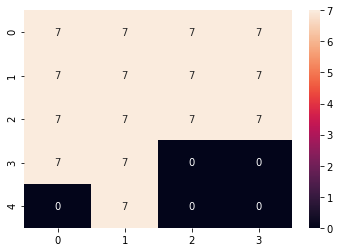

In [8]:
import seaborn as sns
f_vals =[]
for row in grid:
    vals=[]
    for col in row:
        vals.append(col.g + col.h)
    f_vals.append(vals)
    
ax = sns.heatmap(f_vals, annot = True, fmt="d")


**PATH**


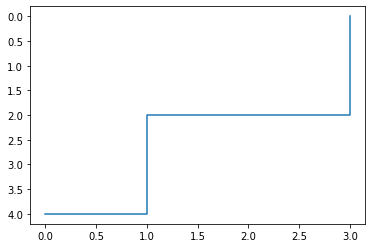

In [9]:
import matplotlib.pyplot as plt
import numpy as np
a=[]
plt.gca().invert_yaxis()
if path:
    print('**PATH**')
    for p in path:
        a.append(p.coord[::-1])
    plt.plot(*zip(*a))
    plt.show()